In [1]:
import utils
import plotting
import simulation
import stanity
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
import os
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd
import utils

In [9]:
"""
load pickle file relating to posterior parameters
Pareto-smoothed importance sampling (PSIS) Leave-one-out cross-validation (LOO)
Higher elpd values indicate better fits. 
Watanabe Akaike Information Criteria,waic, lower is better
"""
nruns = 17
nmodels = 4
waic =  np.zeros((nmodels,nruns))
lppd =  np.zeros((nmodels,nruns))
pwaic=  np.zeros((nmodels,nruns))
elpd =  np.zeros((nmodels,nruns))
n_eff = np.zeros((nmodels,nruns))

k=0
for m in ['modelt','modelv', 'modela', 'modelp']:
    print(m)
    for i in range(nruns):
        pkl = utils.load_pickle("save/boot/"+str(i+1)+"/"+ str(i+1) + "_"+m+".pkl")
        fit = pkl['fit']
        out = utils.waic(log_likelihood=fit['log_lik'])
        waic[k,i] = out['waic']
        lppd[k,i] = out['lppd']
        pwaic[k,i] = out['p_waic']

        psisloo = stanity.psisloo(fit['log_lik'])
        elpd[k,i] = psisloo.elpd
        
        n_eff_out = utils.n_eff(stan_fit=fit, pars=['deltasd', 'tersd', 'alphasd', 'etasd', 'deltahier', 'terhier',
                                                    'alphahier', 'etahier', 'delta', 'ter', 'alpha', 'eta', 'lp__'])
        n_eff[k,i] = n_eff_out['n_eff'].mean()
    k+=1

modelt
modelv
modela
modelp


In [20]:
#effective number
n_eff.mean(axis=1)

array([6105.80903127, 7540.08560176, 5701.45836555, 6940.33261785])

In [12]:
list_subjs = ['sub-003', 'sub-007', 'sub-011', 'sub-014']

ts_y, ts_parts, ts_cond_coher, ts_cond_spat, ts_conds, = utils.get_data(list_subj=list_subjs, idx_subj = [3, 7, 11, 14])

test = pd.DataFrame({'tr_y':ts_y,
                      'tr_parts':ts_parts,
                      'tr_cond_coher':ts_cond_coher,
                      'tr_cond_spat':ts_cond_spat,
                      'tr_conds':ts_conds})
test.to_csv("save/boot/test.csv", index=False)

{'y': array([-0.5720058 , -1.163605  ,  0.56594752, ...,  0.73041096,
         0.7188542 ,  0.52602419]),
 'participant': array([ 3,  3,  3, ..., 14, 14, 14]),
 'cond_coher': array([2, 2, 2, ..., 2, 2, 2]),
 'cond_spat': array([1, 2, 1, ..., 2, 1, 1]),
 'conds': array([3, 4, 3, ..., 4, 3, 3])}

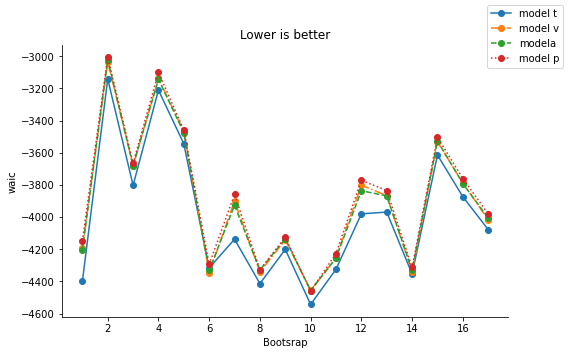

In [13]:
fig = plt.figure(figsize=(8,5))
xx = list(range(1,nruns+1))
plt.plot(xx,waic[0], marker="o")
plt.plot(xx,waic[1], '-.',marker="o")
plt.plot(xx,waic[2], '--', marker="o")
plt.plot(xx,waic[3], ':', marker="o")
plt.xlabel("Bootsrap")
plt.ylabel("waic")
plt.title('Lower is better')
fig.legend(labels=["model t",'model v', 'modela', 'model p'])
sns.despine()
plt.savefig('figures/waic.pdf')

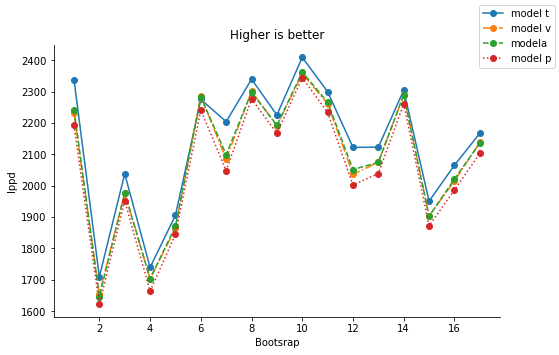

In [14]:
fig = plt.figure(figsize=(8,5))
xx = list(range(1,nruns+1))
plt.plot(xx,lppd[0], marker="o")
plt.plot(xx,lppd[1], '-.',marker="o")
plt.plot(xx,lppd[2], '--', marker="o")
plt.plot(xx,lppd[3], ':', marker="o")
plt.xlabel("Bootsrap")
plt.ylabel("lppd")
plt.title('Higher is better')
fig.legend(labels=["model t",'model v', 'modela', 'model p'])
sns.despine()
plt.savefig('figures/lppd.pdf')

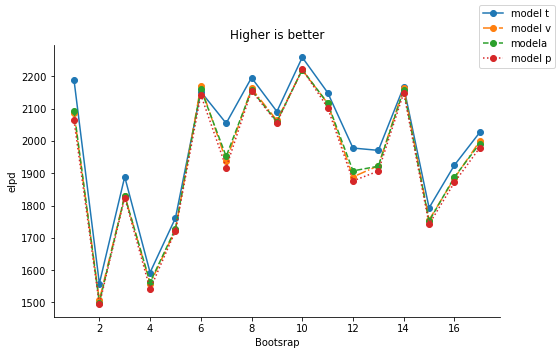

In [15]:
fig = plt.figure(figsize=(8,5))
xx = list(range(1,nruns+1))
plt.plot(xx,elpd[0], marker="o")
plt.plot(xx,elpd[1], '-.',marker="o")
plt.plot(xx,elpd[2], '--', marker="o")
plt.plot(xx,elpd[3], ':', marker="o")
plt.xlabel("Bootsrap")
plt.ylabel("elpd")
plt.title('Higher is better')
fig.legend(labels=["model t",'model v', 'modela', 'model p'])
sns.despine()
plt.savefig('figures/elpd.pdf')

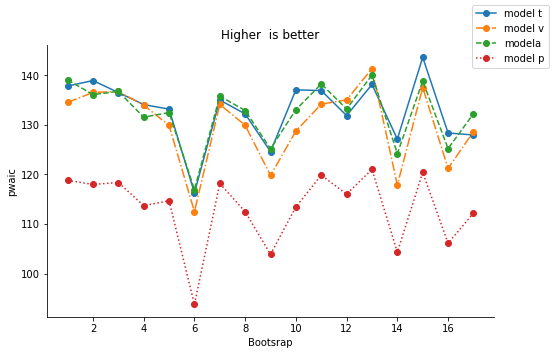

In [16]:
fig = plt.figure(figsize=(8,5))
xx = list(range(1,nruns+1))
plt.plot(xx,pwaic[0], marker="o")
plt.plot(xx,pwaic[1], '-.',marker="o")
plt.plot(xx,pwaic[2], '--', marker="o")
plt.plot(xx,pwaic[3], ':', marker="o")
plt.xlabel("Bootsrap")
plt.ylabel("pwaic")
plt.title('Higher  is better')
fig.legend(labels=["model t",'model v', 'modela', 'model p'])
sns.despine()
plt.savefig('figures/pwaic.pdf')

In [135]:
# load pickle file
run = '1'
pkl = utils.load_pickle("save/boot/"+run+"/"+ run + "_modelt.pkl")
fit = pkl['fit']
#samples of posterior parameters
samples = fit.extract(permuted=True)

### rhat

In [34]:
rhatdf = utils.rhat(stan_fit=fit, pars=pars=['deltasd', 'tersd', 'alphasd', 'etasd', 'deltahier', 'terhier',
                                             'alphahier', 'etahier', 'delta', 'ter', 'alpha', 'eta', 'lp__'])
rhatdf

SyntaxError: invalid syntax (<ipython-input-34-f8fb846f35ce>, line 1)

In [151]:
rhatdf['rhat'] - 1

0   -8.614202e-05
1   -8.077262e-05
2    5.288234e-05
3   -8.410552e-07
4   -4.937769e-07
5    8.533713e-05
Name: rhat, dtype: float64